# Segmentasi Berdasarkan Pendidikan

# Latar Belakang

Dalam dunia bisnis, memahami pelanggan adalah kunci untuk kesuksesan. Salah satu cara untuk memahami pelanggan adalah dengan melakukan segmentasi berdasarkan karakteristik tertentu, seperti pendidikan. Tingkat pendidikan dapat memengaruhi cara pelanggan berbelanja dan berapa banyak mereka mengeluarkan uang. Oleh karena itu, penting bagi perusahaan untuk mengetahui bagaimana pendidikan memengaruhi pengeluaran pelanggan agar dapat merancang strategi pemasaran yang lebih efektif.

# Pernyataan Masalah

Meskipun ada banyak penelitian tentang hubungan antara pendidikan dan perilaku konsumen, masih belum jelas bagaimana tingkat pendidikan memengaruhi pengeluaran pelanggan di industri tertentu. Pertanyaan yang ingin dijawab dalam analisis ini adalah:

1. Bagaimana rata-rata pengeluaran pelanggan berbeda berdasarkan tingkat pendidikan?
2. Apakah ada pola tertentu dalam pengeluaran yang terkait dengan pendidikan?
3. Bagaimana informasi ini dapat membantu perusahaan dalam strategi pemasaran mereka?

# Data

Untuk menjawab pertanyaan di atas, kita akan menganalisa data supermarket yang sudah dikumpulkan oleh perusahaan.

In [79]:
pip install pandas matplotlib seaborn

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'C:\Users\MyBook Hype AMD\Documents\JCDS 2604 020 Purwadhika\Supermarket Customers.csv'
df = pd.read_csv(file_path, sep='\t')

Berikut adalah daftar dan penjelasan terkait kolom yang ada didalam dataset tersebut :

1. ID	                :    Nomor identifikasi unik untuk setiap pelanggan.
2. Year_Birth	        :    Tahun kelahiran pelanggan, digunakan untuk menghitung usia.
3. Education	        :    Tingkat pendidikan pelanggan (misalnya, PhD, Master, Graduation).
4. Marital_Status	    :    Status pernikahan pelanggan (misalnya, Single, Married, Together, Divorced).
5. Income	            :    Pendapatan tahunan pelanggan dalam satuan mata uang (misalnya, dolar).
6. Kidhome	            :    Jumlah anak yang tinggal di rumah pelanggan.
7. Teenhome	            :    Jumlah remaja yang tinggal di rumah pelanggan.
8. Dt_Customer	        :    Tanggal pelanggan terdaftar dalam sistem (format: DD-MM-YYYY).
9. Recency	            :    Jumlah hari sejak pembelian terakhir pelanggan (semakin kecil angkanya, semakin baru pembelian).
10. MntWines	        :    Jumlah uang yang dibelanjakan untuk anggur oleh pelanggan dalam periode tertentu.
11. MntFruits	        :    Jumlah uang yang dibelanjakan untuk buah-buahan oleh pelanggan dalam periode tertentu.
12. MntMeatProducts	    :    Jumlah uang yang dibelanjakan untuk produk daging oleh pelanggan dalam periode tertentu.
13. MntFishProducts	    :    Jumlah uang yang dibelanjakan untuk produk ikan oleh pelanggan dalam periode tertentu.
14. MntSweetProducts    :	   Jumlah uang yang dibelanjakan untuk produk manis oleh pelanggan dalam periode tertentu.
15. MntGoldProds	    :    Jumlah uang yang dibelanjakan untuk produk emas oleh pelanggan dalam periode tertentu.
16. NumDealsPurchases   :    Jumlah pembelian yang dilakukan pelanggan dengan diskon atau penawaran khusus.
17. NumWebPurchases	    :    Jumlah pembelian yang dilakukan pelanggan melalui situs web.
18. NumStorePurchases	:    Jumlah pembelian yang dilakukan pelanggan di toko fisik.
19. NumWebVisitsMonth	:    Jumlah kunjungan pelanggan ke situs web dalam sebulan terakhir.
20. NumCatalogPurchases	:    Jumlah pembelian yang dilakukan pelanggan melalui katalog.
21. NumCampaigns	    :    Jumlah kampanye pemasaran yang diikuti pelanggan.
22. NumResponses	    :    Jumlah tanggapan yang diberikan pelanggan terhadap kampanye pemasaran.

Berikut adalah 5 baris teratas dan terbawah dari dataset Supermarket Customers. 

In [82]:
# Baca file CSV
df = pd.read_csv(r'C:\Users\MyBook Hype AMD\Documents\JCDS 2604 020 Purwadhika\Supermarket Customers.csv', sep='\t')

# Ambil 5 baris teratas dan terbawah
top_5 = df.head(5)
bottom_5 = df.tail(5)

# Gabungkan kedua dataframe
combined_df = pd.concat([top_5, bottom_5])

# Tampilkan dataframe
print(combined_df.to_string(index=False))

   ID  Year_Birth  Education Marital_Status  Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response
 5524        1957 Graduation         Single 58138.0        0         0  04-09-2012       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0              3         11         1
 2174        1954 Graduation         Single 46344.0        1         1  08-03-2014       38        11          1                6                2                 1             6                  2                1      

# Data Understanding

Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan data understanding. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan data cleaning. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara domain knowledge maupun secara statistik

In [83]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

Penjelasan

Dataset ini memiliki 2240 baris dan 29 kolom. 

Dataset ini berisi data tentang pelanggan yang mencakup informasi demografis, pembelian, dan interaksi kampanye pemasaran.

Dataset ini dapat digunakan untuk berbagai macam analisis data, termasuk:
- Analisis pelanggan
- Segmentasi pelanggan
- Pemasaran tertarget
- Prediksi perilaku pelanggan
- Peningkatan retensi pelanggan

In [84]:
# Menampilkan Informasi Dasar (data understanding)
print("Informasi Dataset:")
print(df.info())

# Menampilkan nama kolom yang ada
print("\nNama Kolom dalam Dataset:")
print(df.columns)

print("\nDataset Awal:")
print(df.head())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases  

 Kolom-kolom dalam dataset ini berisi informasi tentang pelanggan, termasuk identitas mereka, demografi, riwayat pembelian, dan interaksi mereka dengan toko. Informasi ini dapat digunakan untuk memahami perilaku pelanggan dan mengembangkan strategi pemasaran yang efektif.

# Missing Value

In [85]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

Secara keseluruhan, dataset ini memiliki tingkat nilai yang hilang yang sangat rendah, dengan sebagian besar kolom tidak memiliki nilai yang hilang. Satu-satunya kolom yang memiliki nilai yang hilang adalah kolom "Income", dengan 1.07% nilai yang hilang.

# Data Cleaning

In [86]:
# Pembersihan Data
# Menghitung usia dari tahun lahir
if 'Year_Birth' in df.columns:
    current_year = 2023  # Ganti dengan tahun saat ini jika perlu
    df['Age'] = current_year - df['Year_Birth']
    
    # Mengatasi missing values di kolom 'Age'
    df['Age'] = df['Age'].fillna(df['Age'].mean())  # Menghindari penggunaan inplace=True

# Menghapus duplikasi jika ada
df.drop_duplicates(inplace=True)

# Menampilkan dataset setelah pembersihan
print("\nDataset Setelah Pembersihan:")
print(df.head())


Dataset Setelah Pembersihan:
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  04-09-2012       58       635  ...             0             0   
1  08-03-2014       38        11  ...             0             0   
2  21-08-2013       26       426  ...             0             0   
3  10-02-2014       26        11  ...             0             0   
4  19-01-2014       94       173  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             

Kolom-kolom dalam dataset menggambarkan berbagai atribut pelanggan, seperti informasi demografis (usia, pendapatan), perilaku pembelian (pengeluaran untuk produk tertentu), dan informasi tentang interaksi pelanggan dengan perusahaan (kampanye pemasaran). Dataset ini bisa digunakan untuk memahami pelanggan dan perilaku mereka, sehingga perusahaan dapat mengembangkan strategi pemasaran yang lebih efektif.

In [87]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,54.194196
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,27.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,46.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,53.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,64.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,130.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


Berikut ini adalah beberapa poin penting dari data:

- Umur rata-rata pelanggan adalah 54 tahun.
- Sebagian besar pelanggan sudah menikah (864 dari 2240).
- Sebagian besar pelanggan memiliki gelar sarjana (1127 dari 2240).
- Rata-rata pelanggan menghabiskan sekitar 303 unit untuk anggur, 26 unit untuk buah-buahan, dan 166 unit untuk produk daging.

Data ini menunjukkan bahwa basis pelanggan sebagian besar terdiri dari orang dewasa yang sudah menikah, berpendidikan, dan memiliki pendapatan yang relatif tinggi. Mereka menunjukkan minat yang besar pada produk makanan dan minuman, khususnya anggur.

# Data Analysis

Kita sudah melakukan tahap data cleaning. Sekarang kita bisa mulai melakukan analisis data untuk mencari tahu penjualan supermarket berdasarkan Segmentasi Pendidikan.

Rumusan masalah :

1. Pola Pembelian Berdasarkan Tingkat Pendidikan
    - Bagaimana perbedaan pola pembelian antara pelanggan dengan tingkat pendidikan berbeda?
    - Apakah ada korelasi antara tingkat pendidikan dengan total pembelanjaan?

2. Preferensi Produk
    - Produk kategori apa yang paling diminati oleh masing-masing segmen pendidikan?
    - Apakah ada korelasi antara tingkat pendidikan dengan total pembelanjaan?

3. Responsivitas terhadap Promosi
    - Bagaimana tingkat respons terhadap kampanye pemasaran di berbagai segmen pendidikan?
    - Jenis promosi apa yang paling efektif untuk setiap tingkat pendidikan?

4. Loyalitaas Pelanggan
    - Apakah tingkat pendidikan mempengaruhi frekuensi kunjungan dan pembelian ulang?
    - Bagaimana hubungan antara tingkat pendidikan dengan durasi hubungan pelanggan?

Sebelumnya mari kita lihat data dari distribusi usia pelanggan dan rata-rata pendapatan pelanggan berdasarkan pendidikan. Setelah itu kita akan melakukan analisis data untuk menjawab pertanyaan diatas.

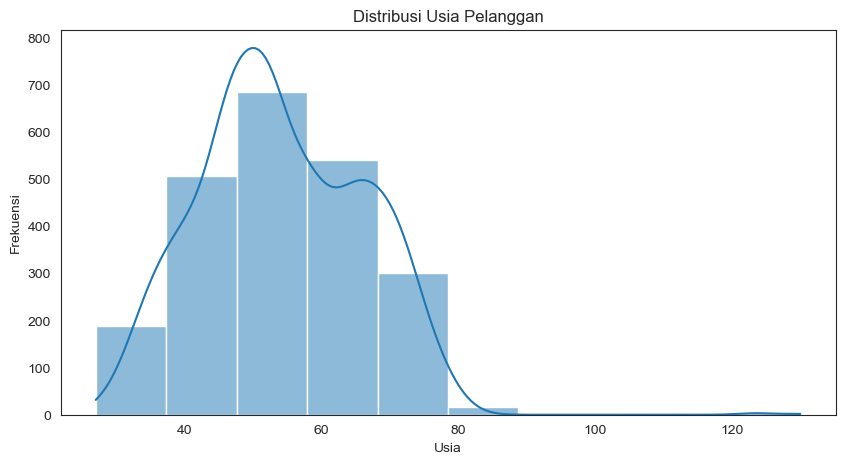

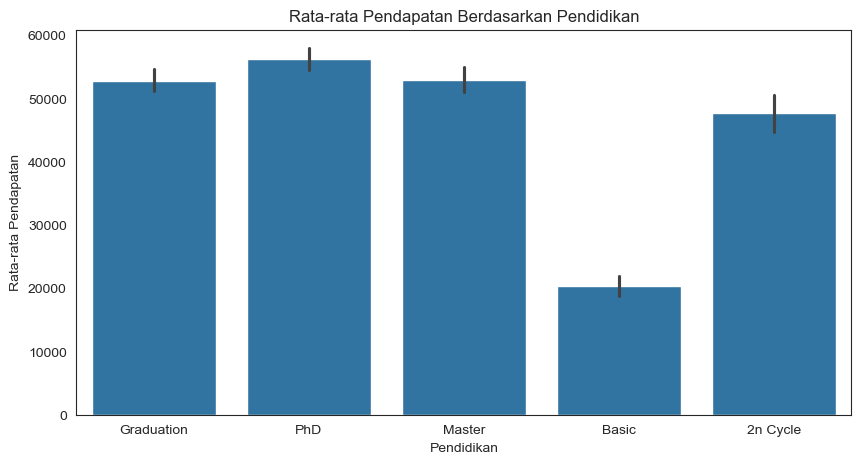

Rata-rata Pendapatan Berdasarkan Pendidikan count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64


In [88]:
# Visualisasi Data
# Histogram untuk distribusi usia
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Distribusi Usia Pelanggan')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()


# Grafik Batang untuk Rata-rata Pendapatan Berdasarkan Pendidikan
plt.figure(figsize=(10, 5))
sns.barplot(x='Education', y='Income', data=df, estimator=np.mean)
plt.title('Rata-rata Pendapatan Berdasarkan Pendidikan')
plt.xlabel('Pendidikan')
plt.ylabel('Rata-rata Pendapatan')
plt.show()

print(f'Rata-rata Pendapatan Berdasarkan Pendidikan {df['Income'].describe()}')


Pertama-tama kita akan menganalisa strategi pemasaran terpersonalisasi

Rata-rata Pembelian per Kategori Berdasarkan Pendidikan:
            MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Education                                                           
2n Cycle      198.18      28.96           141.26            47.48   
Basic           7.24      11.11            11.44            17.06   
Graduation    284.27      30.77           179.49            43.15   
Master        333.08      21.65           163.38            32.10   
PhD           404.50      20.05           168.60            26.73   

            MntSweetProducts  MntGoldProds  
Education                                   
2n Cycle               34.25         46.40  
Basic                  12.11         22.83  
Graduation             31.37         50.85  
Master                 21.18         40.40  
PhD                    20.22         32.31  


<Figure size 1200x600 with 0 Axes>

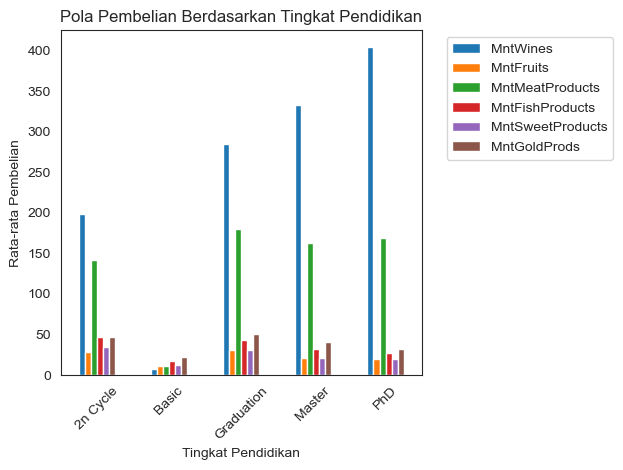

In [89]:
# Analisis segmentasi berdasarkan pendidikan
education_segments = df.groupby('Education').agg({
    'MntWines': 'mean',
    'MntFruits': 'mean',
    'MntMeatProducts': 'mean',
    'MntFishProducts': 'mean',
    'MntSweetProducts': 'mean',
    'MntGoldProds': 'mean'
}).round(2)

print("Rata-rata Pembelian per Kategori Berdasarkan Pendidikan:")
print(education_segments)

# Visualisasi
plt.figure(figsize=(12, 6))
education_segments.plot(kind='bar')
plt.title('Pola Pembelian Berdasarkan Tingkat Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Rata-rata Pembelian')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

Lalu kita akan melihat program loyalitas berbasis pendidikan

In [90]:
# Analisis loyalitas
loyalty_metrics = df.groupby('Education').agg({
    'NumWebVisitsMonth': 'mean',
    'NumWebPurchases': 'mean',
    'NumStorePurchases': 'mean',
    'Recency': 'mean'
}).round(2)

print("\nMetrik Loyalitas Berdasarkan Pendidikan:")
print(loyalty_metrics)


Metrik Loyalitas Berdasarkan Pendidikan:
            NumWebVisitsMonth  NumWebPurchases  NumStorePurchases  Recency
Education                                                                 
2n Cycle                 5.45             3.73               5.51    48.42
Basic                    6.87             1.89               2.85    48.44
Graduation               5.29             4.13               5.83    50.04
Master                   5.18             4.03               5.90    47.59
PhD                      5.26             4.42               6.06    48.48


Setelah itu kita akan menganalisa rekomendasi produk spesifik

In [91]:
# Analisis preferensi produk
product_preferences = df.groupby('Education')[['MntWines', 'MntFruits', 'MntMeatProducts', 
                                             'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()
                                             
# Mencari produk favorit per segmen
favorite_products = product_preferences.idxmax(axis=1)
print("\nProduk Favorit per Tingkat Pendidikan:")
print(favorite_products)


Produk Favorit per Tingkat Pendidikan:
Education
2n Cycle          MntWines
Basic         MntGoldProds
Graduation        MntWines
Master            MntWines
PhD               MntWines
dtype: object


Implementasi Solusi:
1. Untuk Segmen PhD:
- Fokus pada produk premium dan wine
- Program loyalitas berbasis poin dengan reward eksklusif
- Newsletter berkala dengan konten edukasi tentang produk
2. Untuk Segmen Master:
- Promosi bundle produk berkualitas tinggi
- Program member dengan benefit khusus
- Akses ke pre-sale events
3. Untuk Segmen Basic/2n Cycle:
- Promosi berbasis nilai (value for money)
- Program diskon regular
- Fokus pada produk kebutuhan sehari-hari

Lalu kita masuk ke strategi komunikasi

In [92]:
# Analisis efektivitas kampanye
campaign_response = df.groupby('Education')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                                           'AcceptedCmp4', 'AcceptedCmp5']].mean()
print("\nTingkat Respons Kampanye per Tingkat Pendidikan:")
print(campaign_response.round(3))


Tingkat Respons Kampanye per Tingkat Pendidikan:
            AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
Education                                                            
2n Cycle           0.069         0.010         0.074         0.049   
Basic              0.000         0.000         0.111         0.000   
Graduation         0.073         0.014         0.069         0.072   
Master             0.049         0.005         0.065         0.084   
PhD                0.062         0.021         0.082         0.093   

            AcceptedCmp5  
Education                 
2n Cycle           0.049  
Basic              0.000  
Graduation         0.076  
Master             0.076  
PhD                0.080  


Setelah itu kita masuk ke Pengembangan program

KPI untuk Monitoring :
1. Peningkatan rata-rata nilai transaksi per segmen
2. Tingkat retensi pelanggan
3. Respons terhadap kampanye marketing
4. Net Promoter Score (NPS)

In [93]:
# Monitoring KPI
kpi_metrics = df.groupby('Education').agg({
    'Income': 'mean',
    'NumWebVisitsMonth': 'mean',
    'NumDealsPurchases': 'mean',
    'Response': 'mean'
}).round(2)

print("\nKPI Metrics per Tingkat Pendidikan:")
print(kpi_metrics)


KPI Metrics per Tingkat Pendidikan:
              Income  NumWebVisitsMonth  NumDealsPurchases  Response
Education                                                           
2n Cycle    47633.19               5.45               2.25      0.11
Basic       20306.26               6.87               1.80      0.04
Graduation  52720.37               5.29               2.31      0.13
Master      52917.53               5.18               2.43      0.15
PhD         56145.31               5.26               2.37      0.21


Dengan implementasi solusi ini, diharapkan dapat:

1. Meningkatkan penjualan per segmen pendidikan
2. Meningkatkan loyalitas pelanggan
3. Mengoptimalkan strategi pemasaran
4. Meningkatkan efisiensi program promosi

Semua ini harus dimonitor secara berkala dan disesuaikan berdasarkan performa dan feedback yang diterima.

# Insights, Trend Analysis, and Strategy

# Insight Berdasarkan Usia dan Pendapatan

Analisis Rata-rata Pendapatan Berdasarkan Usia


C:\Users\MyBook Hype AMD\AppData\Local\Temp\ipykernel_15620\717404038.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_by_age_group = df.groupby('Age Group')['Income'].mean().reset_index()


  Age Group        Income
0     20-29  58295.400000
1     30-39  44707.287449
2     40-49  49776.875000
3     50-59  51441.318253
4     60-69  56431.565310


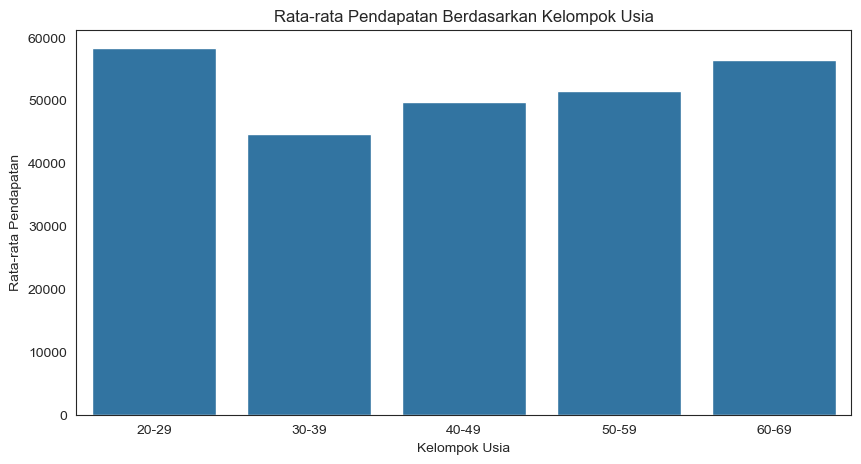

In [94]:
# Membuat kelompok usia
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Menghitung rata-rata pendapatan berdasarkan kelompok usia
income_by_age_group = df.groupby('Age Group')['Income'].mean().reset_index()

# Menampilkan hasil
print(income_by_age_group)

# Grafik batang untuk rata-rata pendapatan berdasarkan kelompok usia
plt.figure(figsize=(10, 5))
sns.barplot(x='Age Group', y='Income', data=income_by_age_group)
plt.title('Rata-rata Pendapatan Berdasarkan Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Rata-rata Pendapatan')
plt.show()

# Analisis Korelasi


Korelasi antara Usia dan Pendapatan: 0.16


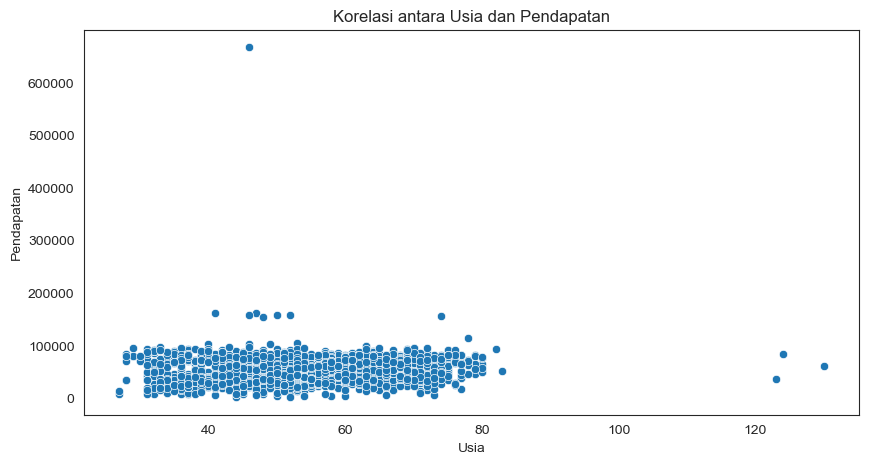

In [95]:
# Menghitung korelasi antara usia dan pendapatan
correlation = df['Age'].corr(df['Income'])
print(f'Korelasi antara Usia dan Pendapatan: {correlation:.2f}')

# Visualisasi korelasi
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Age', y='Income', data=df)
plt.title('Korelasi antara Usia dan Pendapatan')
plt.xlabel('Usia')
plt.ylabel('Pendapatan')
plt.show()

# Segmentasi Pelanggan

C:\Users\MyBook Hype AMD\AppData\Local\Temp\ipykernel_15620\3547967765.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_count = df.groupby(['Age Group', 'Education']).size().unstack(fill_value=0)


Education  2n Cycle  Basic  Graduation  Master  PhD
Age Group                                          
20-29             3      1           6       0    0
30-39            30     18         138      28   35
40-49            77     18         305      85  103
50-59            45      9         327     114  154
60-69            37      5         237      87  109


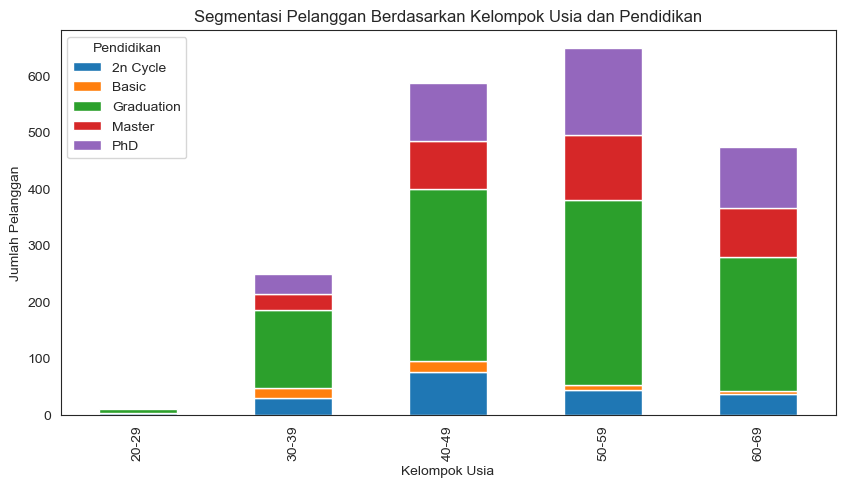

In [96]:
segment_count = df.groupby(['Age Group', 'Education']).size().unstack(fill_value=0)

print(segment_count)

segment_count.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Segmentasi Pelanggan Berdasarkan Kelompok Usia dan Pendidikan')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Pendidikan')
plt.show()

# Analisis Tren

a. Analisis Menggunakan Kolom Tanggal

In [97]:
import pandas as pd

data = {
    'Dt_Customer': ['21-08-2013', '15-05-2014', '30-12-2015']
}
df = pd.DataFrame(data)

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

df['Year'] = df['Dt_Customer'].dt.year
df['Month'] = df['Dt_Customer'].dt.month

print(df)

  Dt_Customer  Year  Month
0  2013-08-21  2013      8
1  2014-05-15  2014      5
2  2015-12-30  2015     12


 Informasi ini untuk menganalisis tren berdasarkan waktu pendaftaran. Misalnya, Anda dapat melihat bagaimana rata-rata pendapatan atau pengeluaran berubah seiring waktu. Lalu setelah ini kita akan melihat heatmap dari korelasi variabel analisis hubungan antar variabel

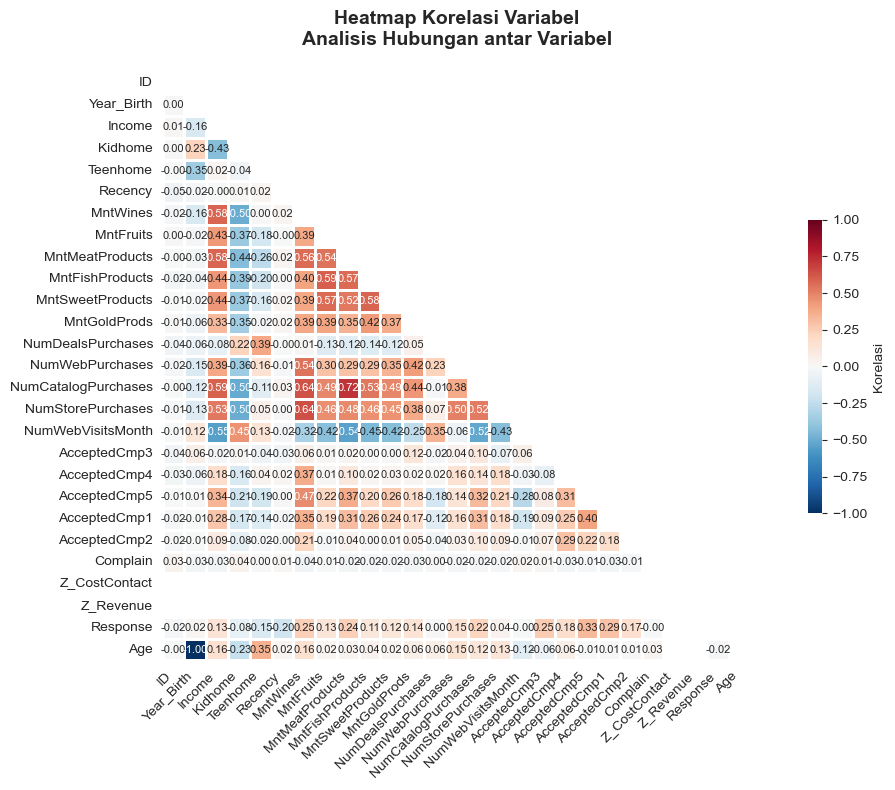

In [54]:
plt.figure(figsize=(12, 8))

sns.set_style("white")

mask = np.triu(np.ones_like(correlation, dtype=bool))

sns.heatmap(correlation,
            mask=mask,
            annot=True,
            fmt='.2f',
            cmap='RdBu_r',  
            square=True,
            linewidths=1,
            cbar_kws={"shrink": .5, 'label': 'Korelasi'},
            annot_kws={'size': 8},
            vmin=-1, vmax=1) 

plt.title('Heatmap Korelasi Variabel\nAnalisis Hubungan antar Variabel', 
          pad=20, size=14, weight='bold')

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()

plt.show()


Korelasi antara variabel:
           Year     Month
Year   1.000000  0.569495
Month  0.569495  1.000000


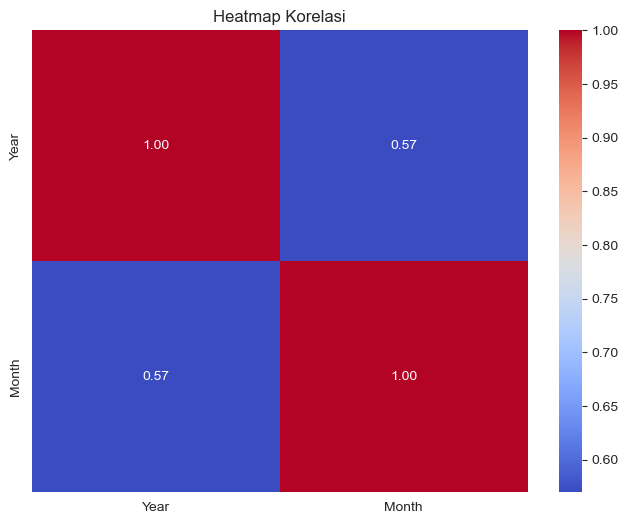

KeyError: 'Marital_Status'

In [105]:
# 5. Wawasan, Analisis Tren, dan Strategi
# Analisis Korelasi
# Pilih hanya kolom numerik untuk analisis korelasi
numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()
print("\nKorelasi antara variabel:")
print(correlation)

# Heatmap untuk visualisasi korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi')
plt.show()

# Menarik Wawasan
# Misalnya, melihat hubungan antara status pernikahan dan pendapatan
marital_income = df.groupby('Marital_Status')['Income'].mean().reset_index()
print("\nRata-rata Pendapatan berdasarkan Status Pernikahan:")
print(marital_income)

Berdasarkan data yang ditampilkan, kita bisa melihat bahwa

- Nilai 1: Hubungan positif sempurna (ketika satu variabel meningkat, variabel lainnya juga meningkat).
- Nilai -1: Hubungan negatif sempurna (ketika satu variabel meningkat, variabel lainnya menurun).
- Nilai 0: Tidak ada hubungan antara variabel.


Lalu kita Menganalisis Korelasi

Income:

- Terdapat korelasi positif yang signifikan dengan variabel pengeluaran seperti MntWines, MntMeatProducts, dan MntFruits, yang menunjukkan bahwa semakin tinggi pendapatan, semakin tinggi pula pengeluaran pada kategori-kategori tersebut.
- Korelasi negatif dengan Year_Birth (-0.161791) menunjukkan bahwa semakin tua seseorang, pendapatan cenderung lebih rendah, meskipun ini mungkin tidak selalu berlaku dalam konteks yang lebih luas.

Kidhome dan Teenhome:

- Terdapat korelasi positif dengan Year_Birth (0.230176) dan negatif dengan Income (-0.428669), yang menunjukkan bahwa individu dengan lebih banyak anak cenderung memiliki pendapatan yang lebih rendah.

Pengeluaran:

- Variabel pengeluaran seperti MntWines, MntMeatProducts, dan MntFruits memiliki korelasi positif yang kuat satu sama lain, menunjukkan bahwa individu yang menghabiskan lebih banyak untuk satu kategori cenderung menghabiskan lebih banyak untuk kategori lainnya.

In [106]:
import pandas as pd

df = pd.read_csv(r'C:\Users\MyBook Hype AMD\Documents\JCDS 2604 020 Purwadhika\Supermarket Customers.csv', sep='\t')

print("Data Awal:")
print(df.head())

print("\nInformasi DataFrame:")
print(df.info())


Data Awal:
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0   

Secara garis besar kita bisa melihat bahwa

Pendapatan: Dengan adanya nilai hilang pada kolom pendapatan, penting untuk mempertimbangkan bagaimana menangani nilai-nilai tersebut, apakah dengan menghapus entri yang hilang atau mengisi nilai tersebut dengan rata-rata atau median.

Pendidikan dan Status Pernikahan: Kolom Education dan Marital_Status dapat memberikan wawasan tentang demografi pelanggan. Misalnya, Anda dapat menganalisis rata-rata pendapatan berdasarkan tingkat pendidikan dan status pernikahan untuk memahami segmen pasar yang berbeda.

Pengeluaran: Kolom pengeluaran untuk berbagai kategori produk dapat digunakan untuk menganalisis pola belanja pelanggan. Misalnya, Anda dapat melihat kategori mana yang paling banyak dibeli oleh pelanggan dengan pendapatan tertentu.

Kampanye Pemasaran: Kolom yang menunjukkan penerimaan kampanye pemasaran dapat membantu dalam mengevaluasi efektivitas kampanye yang telah dilakukan. Anda dapat menganalisis apakah ada hubungan antara penerimaan kampanye dan pendapatan atau pengeluaran.

Total Pengeluaran Berdasarkan Pendidikan:
    Education  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0    2n Cycle     40231       5878            28675             9639   
1       Basic       391        600              618              921   
2  Graduation    320371      34683           202284            48630   
3      Master    123238       8012            60450            11877   
4         PhD    196585       9744            81941            12990   

   MntSweetProducts  MntGoldProds  
0              6953          9419  
1               654          1233  
2             35351         57307  
3              7835         14947  
4              9828         15703  


<Figure size 1200x800 with 0 Axes>

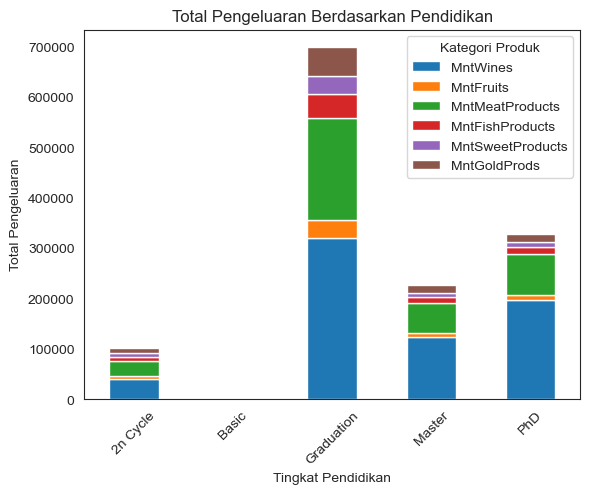

In [107]:
# Menghitung total pengeluaran berdasarkan pendidikan
education_spending = df.groupby('Education').agg({
    'MntWines': 'sum',
    'MntFruits': 'sum',
    'MntMeatProducts': 'sum',
    'MntFishProducts': 'sum',
    'MntSweetProducts': 'sum',
    'MntGoldProds': 'sum'
}).reset_index()

# Menampilkan hasil
print("Total Pengeluaran Berdasarkan Pendidikan:")
print(education_spending)

# Membuat visualisasi
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
education_spending.set_index('Education').plot(kind='bar', stacked=True)
plt.title('Total Pengeluaran Berdasarkan Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Total Pengeluaran')
plt.legend(title='Kategori Produk')
plt.xticks(rotation=45)
plt.show()

- Analisis Pengeluaran Berdasarkan Pendidikan

a. Graduation:

Pengeluaran tertinggi terlihat pada kelompok dengan pendidikan Graduation, dengan total pengeluaran untuk semua kategori mencapai 320,371 untuk MntWines, 34,683 untuk MntFruits, 202,284 untuk MntMeatProducts, dan seterusnya. Ini menunjukkan bahwa individu dengan pendidikan ini cenderung memiliki daya beli yang lebih tinggi dan lebih banyak menghabiskan uang untuk produk-produk tersebut.

b. PhD:

Kelompok dengan pendidikan PhD juga menunjukkan pengeluaran yang signifikan, terutama pada MntWines (196,585) dan MntMeatProducts (81,941). Ini menunjukkan bahwa individu dengan gelar PhD juga memiliki pengeluaran yang tinggi, meskipun tidak setinggi kelompok Graduation.

c. Master:

Individu dengan pendidikan Master memiliki pengeluaran yang lebih rendah dibandingkan dengan Graduation dan PhD, tetapi masih cukup signifikan, terutama pada MntWines (123,238) dan MntMeatProducts (60,450).

d. 2n Cycle dan Basic:

Kelompok dengan pendidikan 2n Cycle dan Basic menunjukkan pengeluaran yang jauh lebih rendah dibandingkan dengan kelompok pendidikan yang lebih tinggi. Ini menunjukkan bahwa individu dengan pendidikan yang lebih rendah cenderung memiliki daya beli yang lebih rendah dan menghabiskan lebih sedikit untuk produk-produk tersebut.

- Kesimpulan Umum

a. Hubungan antara Pendidikan dan Pengeluaran: Data ini menunjukkan bahwa terdapat hubungan positif antara tingkat pendidikan dan total pengeluaran. Individu dengan pendidikan yang lebih tinggi cenderung menghabiskan lebih banyak untuk berbagai kategori produk, yang mungkin mencerminkan daya beli yang lebih tinggi dan preferensi untuk produk berkualitas.

b. Strategi Pemasaran: Informasi ini dapat digunakan oleh perusahaan untuk merancang strategi pemasaran yang lebih efektif. Misalnya, mereka dapat menargetkan kampanye pemasaran yang berbeda untuk kelompok pendidikan yang berbeda, dengan fokus pada produk premium untuk individu dengan pendidikan lebih tinggi.

c. Segmentasi Pasar: Data ini juga dapat membantu dalam segmentasi pasar, di mana perusahaan dapat mengidentifikasi segmen-segmen yang berbeda berdasarkan pendidikan dan menyesuaikan penawaran produk mereka sesuai dengan kebutuhan dan preferensi masing-masing segmen.


